# Classification and Determining High Risk Bank Customers
---
### **Introduction**
We are provided with data of customers from a bank. We are tasked to make statistical sense out of the customer information provided.  
Looking at the data, we can classify these customers into segements and further determine the risk of defluating by potential customers in the future. 

### **Data**
Data was extracted from this [link](https://newonlinecourses.science.psu.edu/onlinecourses/sites/stat508/files/lesson01/Credit.data) which was made available to me by my Professor 

### **Methodology**
We will replace catergorical variables with values. Since the data has no missing values we will proceed to modelling.
K-means clustering will be used to segement data. The number of clusters to use will be determined using the elbow method.
Afterwards, we will use a logistic regression to determine the probability of a customer deflauting on a loan. To evaluate the model we will use Jaccard similarity index.

In [1]:
import pandas as pd
import numpy as np

### We import customer data to be used into Pandas Dataframe

In [2]:
df = pd.read_csv('Try Data.csv')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### Data Wrangling

In [3]:
#Labelling Catergorical Variables as values  
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

df['Student'] = df['Student'].astype('category')
df['Student'] = df['Student'].cat.codes

df['Married'] = df['Married'].astype('category')
df['Married'] = df['Married'].cat.codes

df['Ethnicity'] = df['Ethnicity'].astype('category')
df['Ethnicity'] = df['Ethnicity'].cat.codes

In [4]:
#View Data Charateristics
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.61250,1.25000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,0.82717,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,1.00000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,1.00000,1.00000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,2.00000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,2.00000,1999.000000


In [5]:
#Checking if there are any missing values
df_missing = df.isnull()
for column in df_missing.columns.values.tolist():
    print(column)
    print (df_missing[column].value_counts())
    print("") 

Income
False    400
Name: Income, dtype: int64

Limit
False    400
Name: Limit, dtype: int64

Rating
False    400
Name: Rating, dtype: int64

Cards
False    400
Name: Cards, dtype: int64

Age
False    400
Name: Age, dtype: int64

Education
False    400
Name: Education, dtype: int64

Gender
False    400
Name: Gender, dtype: int64

Student
False    400
Name: Student, dtype: int64

Married
False    400
Name: Married, dtype: int64

Ethnicity
False    400
Name: Ethnicity, dtype: int64

Balance
False    400
Name: Balance, dtype: int64



### We will use K-means to cluster customers because data is unlabeled 

In [6]:
#libraries used for the study
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

#### Using Elbow method to determine number of clusters

In [7]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

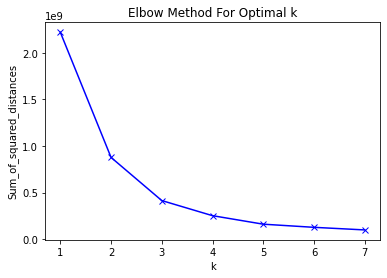

In [8]:
#Visualising the Elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the above figure, the elbow occurs at 2 so we will cluster customers into 2 segements

In [9]:
#Normalize data for clustering
X = df.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.86158299, -0.48999879, -0.46553881, ...,  0.79539491,
         0.9078413 , -0.40727698],
       [ 1.72743711,  0.82826106,  0.82870309, ...,  0.79539491,
        -0.30261377,  0.83405596],
       [ 1.68675551,  1.01478681,  1.02931059, ..., -1.25723711,
        -0.30261377,  0.13063396],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285, ...,  0.79539491,
         0.9078413 , -0.83194351],
       [-0.21280808, -0.95891584, -1.05441888, ...,  0.79539491,
         0.9078413 , -1.13247675],
       [-0.75334493,  0.34199278,  0.38866085, ..., -1.25723711,
        -0.30261377,  0.97125591]])

We model data using 2 clusters now

In [10]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
#print(labels)

We append cluster labels to 

In [11]:
df['Cluster Label'] = labels
df.head(20)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Cluster Label
0,14.891,3606,283,2,34,11,0,0,1,2,333,0
1,106.025,6645,483,3,82,15,1,1,1,1,903,1
2,104.593,7075,514,4,71,11,0,0,0,1,580,1
3,148.924,9504,681,3,36,11,1,0,0,1,964,1
4,55.882,4897,357,2,68,16,0,0,1,2,331,0
5,80.180,8047,569,4,77,10,0,0,0,2,1151,1
6,20.996,3388,259,2,37,12,1,0,0,0,203,0
7,71.408,7114,512,2,87,9,0,0,0,1,872,1
8,15.125,3300,266,5,66,13,1,0,0,2,279,0
9,71.061,6819,491,3,41,19,1,1,1,0,1350,1


In [12]:
df.groupby('Cluster Label').mean()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Cluster Label,,,,,,,,,,,
0,30.787038,3462.033835,269.466165,2.943609,54.812030,13.593985,0.500000,0.086466,0.601504,1.229323,272.421053
1,73.867179,7263.723881,524.611940,2.985075,57.365672,13.164179,0.552239,0.126866,0.634328,1.291045,1011.507463


## From the average values, we can define each cluster as follows:
### **Cluster 0** 
*LOW Income, Limit, Ratings and Balance*
### **Cluster 1**
*HIGH Income, Limit, Ratings and Balance*

## Conclusion
Based on the observation, we can conclude that a customer in cluster 0 is likely to default on loan advancement due to their low credit ratings. 

We will therefore further our study by modelling a logistic regression to determine the probability of a customer defaulting

---
## Logistic Regression

In [13]:
#Setting the Cluster Label column as our dependent variable for supervised learning
y = np.asarray(df['Cluster Label'])
y[0:5]

array([0, 1, 1, 1, 0], dtype=int32)

In [14]:
# We will split data into test and training data test validity of our model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (280, 11) (280,)
Test set: (120, 11) (120,)


In [15]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
# We predict for our test set to evaluate our model
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int32)

In [17]:
#Set values to 4 decimal places
np.set_printoptions(precision=4, suppress=True)

In [18]:
# We predict the probability of defaulting 
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.    , 1.    ],
       [0.9771, 0.0229],
       [0.9969, 0.0031],
       [0.5213, 0.4787],
       [0.7653, 0.2347]])

The first column is the probability of deflauting, P(Y=0|X), and second column is probability of not deflauting, P(Y=1|X)

In [19]:
# We use Jaccard Index to test the goodness of our model  
from sklearn.metrics import jaccard_similarity_score
print('Jaccard Index: ', jaccard_similarity_score(y_test, yhat) )

Jaccard Index:  0.9333333333333333


We have a very high Jaccard index. This means that our model is very good for predicting. 

Now that we know that our model is highly a good predictor, we use the whole data to train our model

In [20]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)

In [21]:
# We print the coefficients and intercept of our model
print ('Coefficients: ', LR.coef_)
print ('Intercept: ',LR.intercept_)

Coefficients:  [[ 0.0604  0.0034 -0.0514 -0.0853 -0.0363 -0.2764  0.0086 -0.0693  0.0131
  -0.0297  0.0077]]
Intercept:  [-0.0545]


In order to determine if the next customer is low risk will use the coefficients and intercept above  